<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-Machine-Learning-2023/blob/main/Week%2012/TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

# Tugas

### **Mendeteksi orientasi teks dan jenis skrip**

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

### **Tugas:**

**1. Persiapan Gambar:**

- Gunakan gambar contoh yang disediakan (`'hitchhikers-rotated.png'`).
- Tampilkan gambar asli menggunakan Python dan OpenCV.

**2. Deteksi Orientasi dan Skrip:**

- Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
- Gunakan Tesseract untuk mendapatkan sudut rotasi (`angle`) dan jenis skrip (`script`).
- Tampilkan hasil orientasi dan jenis skrip.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

In [3]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


### **Menampilkan Gambar Asli**

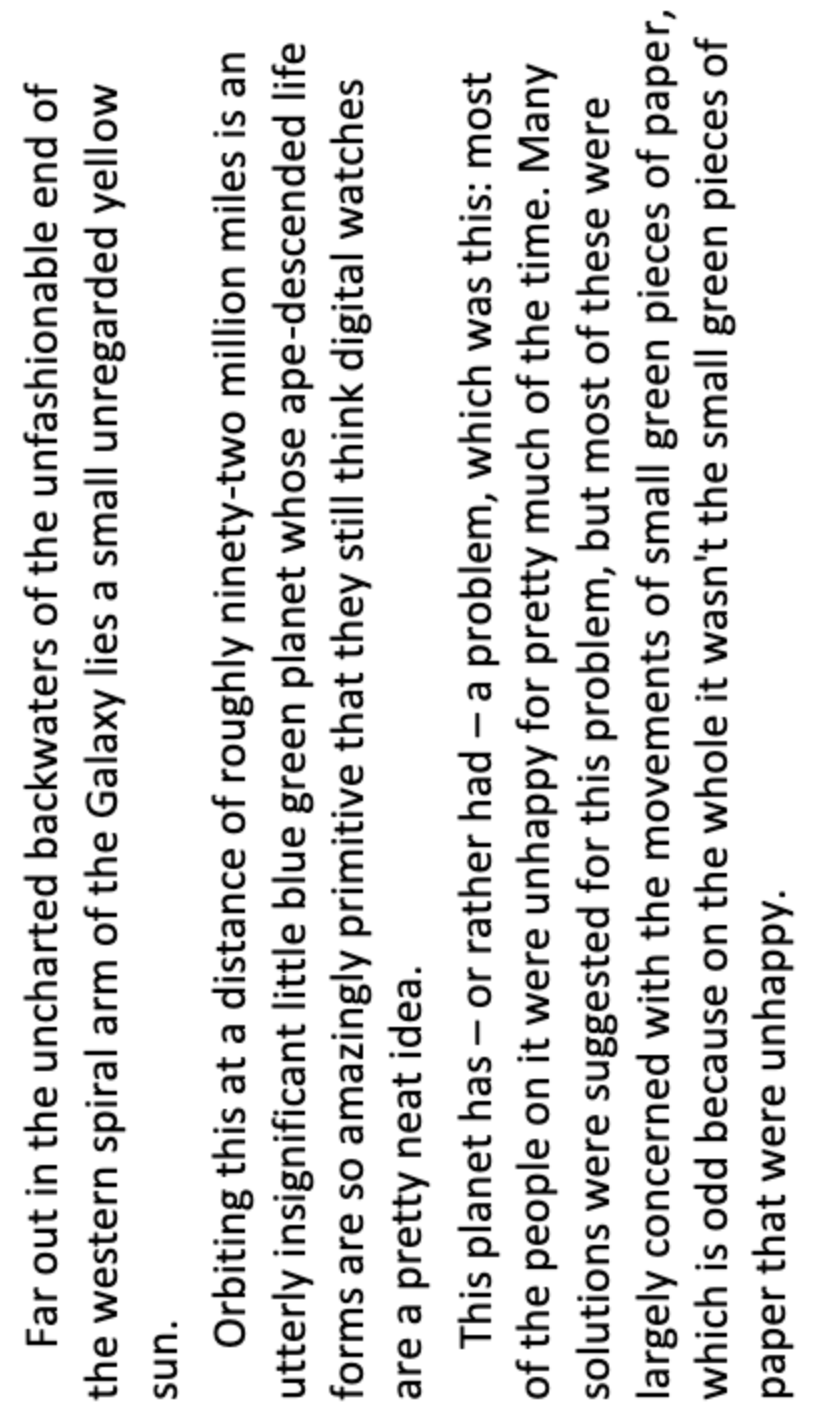

In [6]:
# Path ke file gambar
path_gambar = '/content/drive/MyDrive/ML/images/hitchhikers-rotated.png'

# Baca gambar menggunakan OpenCV
gambar = cv2.imread(path_gambar)

# Tampilkan gambar asli
cv2_imshow(gambar)

### **Menggunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).**

Orientasi yang Terdeteksi: 270.0 derajat
Jenis Skrip yang Terdeteksi: Rotate: 90


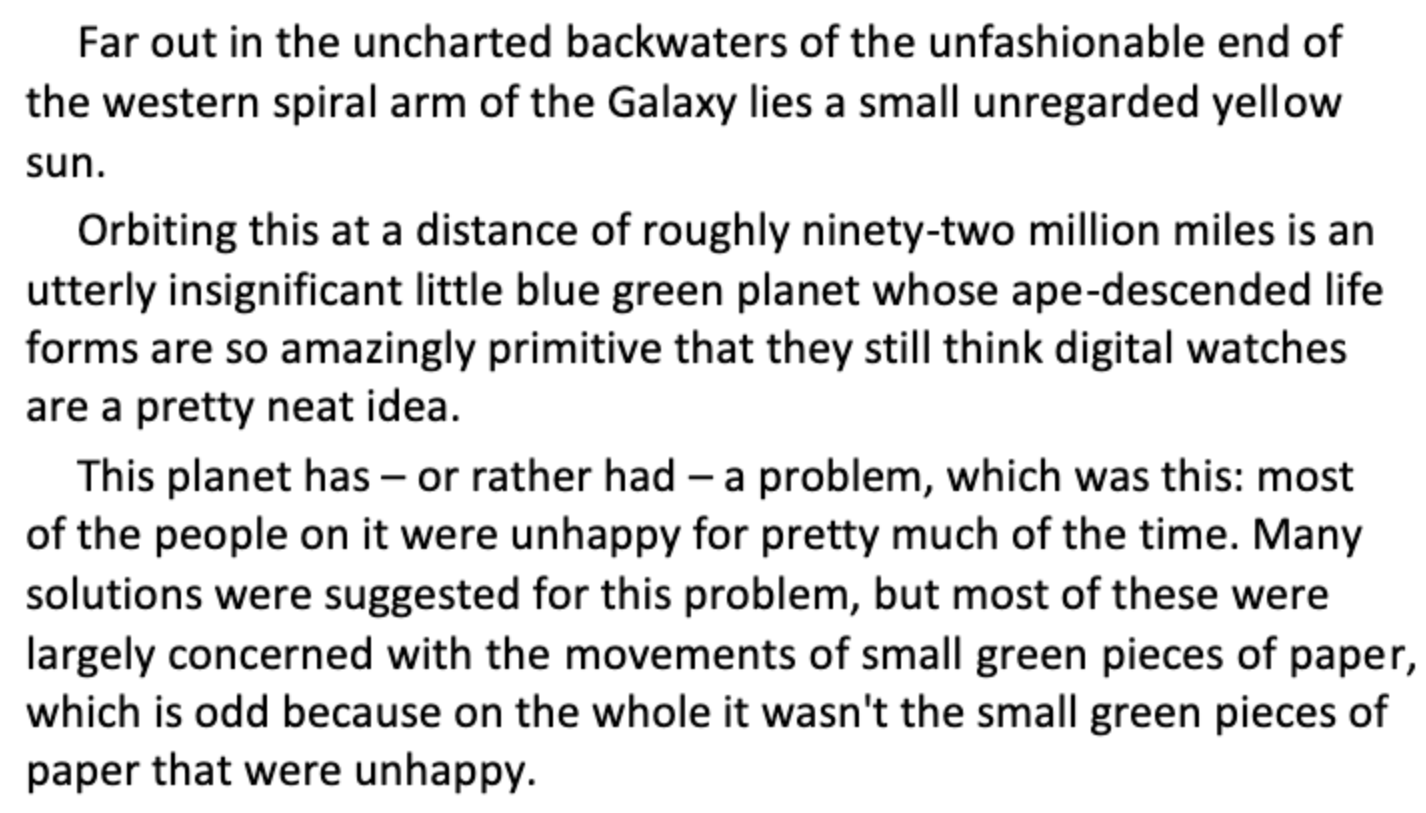

In [11]:
# Konversi gambar ke skala abu-abu
gambar_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

# Gunakan pytesseract untuk mendeteksi orientasi teks dan jenis skrip
orientasi, skrip = pytesseract.image_to_osd(gambar_abu, lang='ind', config='--psm 0').splitlines()[1:3]

# Konversi orientasi ke tipe float
sudut_rotasi = float(orientasi.split()[-1])

# Tampilkan hasil
print(f"Orientasi yang Terdeteksi: {sudut_rotasi} derajat")
print(f"Jenis Skrip yang Terdeteksi: {skrip}")

# Putar gambar untuk koreksi orientasi
if sudut_rotasi == 270:
    gambar_terputar = cv2.rotate(gambar, cv2.ROTATE_90_CLOCKWISE)
else:
    gambar_terputar = cv2.rotate(gambar, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Tampilkan gambar yang terputar menggunakan cv2_imshow
cv2_imshow(gambar_terputar)

### **Menggunakan Tesseract untuk Mengekstrak Teks dari Gambar**

In [12]:
# Ekstrak teks dari gambar menggunakan Tesseract
teks_ekstrak = pytesseract.image_to_string(gambar_terputar, lang='ind')

# Tampilkan teks yang berhasil diekstrak
print("Teks yang diekstrak:")
print(teks_ekstrak)

Teks yang diekstrak:
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

